In [90]:
import requests
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Replace with your actual API key
api_key = '85e0cce8'

# Define a function to get movie data from TMDb API
def get_movie_data(title):
    
    url = f'https://www.omdbapi.com/?t={title}&apikey={api_key}'
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            if data['Response']== 'True':
                return data
            else:
                print(f"Movie not found or error from API: {data.get('Error', 'Unknown error')}")
                return None
        else:
            print(f"HTTP Error {response.status_code}: {response.text}")
            return None
    except requests.exceptions.RequestException as e:
        print(f"Request failed: {e}")
        return None

# Example movie titles
titles = ["Her", "A Beautiful Mind", "Django Unchained", "The Shape of Water", "Coco", "Slumdog Millionaire", "1917", "Arrival", 
"Black Panther", "Requiem for a Dream", "Eternal Sunshine of the Spotless Mind", "The Prestige", "The Pianist", "Spotlight", 
"Moonlight", "12 Years a Slave", "The Revenant", "Gravity", "The Irishman", "Joker", "Toy Story 3", "Shrek", "Finding Nemo", 
"The Incredibles", "WALL-E", "The Matrix Reloaded", "Up", "X-Men: Days of Future Past", "Avengers: Endgame", "Iron Man", 
"Spider-Man 2", "Guardians of the Galaxy", "Logan", "The Bourne Ultimatum", "Casino Royale", "John Wick", "Skyfall", 
"Brokeback Mountain", "A Star is Born", "The Curious Case of Benjamin Button", "The King's Speech", "Little Miss Sunshine", 
"The Fighter", "Lady Bird", "The Hurt Locker", "Once Upon a Time in Hollywood", "The Big Short", "Juno", "Memento", "Oldboy", 
"Drive", "The Tree of Life", "The Girl with the Dragon Tattoo", "Shutter Island", "Prisoners", "Room", "Marriage Story", 
"Birdman", "Knives Out", "The Handmaiden", "The Ballad of Buster Scruggs", "The Batman", "The Lighthouse", "Dune", "Nightcrawler", 
"Gone Girl", "The Trial of the Chicago 7", "Nomadland", "Minari", "The Farewell", "Crouching Tiger, Hidden Dragon", 
"Lost in Translation", "Sin City", "Pan’s Labyrinth", "The Lives of Others", "3:10 to Yuma", "Children of Men", "Zodiac", 
"A Serious Man", "Tinker Tailor Soldier Spy"]

# List to hold movie data
movie_data = []

# Retrieve data for each movie
for title in titles:
    data = get_movie_data(title)
    if data:
        movie_data.append({
            'Title': data.get('Title', 'N/A'),
            'Year': data.get('Year', 'N/A'),
            'Runtime': data.get('Runtime', 'N/A'),
            'Genre': data.get('Genre', 'N/A'),
            'Language': data.get('Language', 'N/A'),
            'Country': data.get('Country', 'N/A'),
            'BoxOffice': data.get('BoxOffice', 'N/A'),
            
        })

# Create a DataFrame from the movie data
df = pd.DataFrame(movie_data)

# Print the DataFrame
print("\nMovie Data:")
print(df)


Movie Data:
                        Title  Year  Runtime                        Genre  \
0                         Her  2013  126 min       Drama, Romance, Sci-Fi   
1            A Beautiful Mind  2001  135 min    Biography, Drama, Mystery   
2            Django Unchained  2012  165 min       Comedy, Drama, Western   
3          The Shape of Water  2017  123 min      Drama, Fantasy, Romance   
4                        Coco  2017  105 min  Animation, Adventure, Drama   
..                        ...   ...      ...                          ...   
75               3:10 to Yuma  2007  122 min         Action, Crime, Drama   
76            Children of Men  2006  109 min        Action, Drama, Sci-Fi   
77                     Zodiac  2007  157 min        Crime, Drama, Mystery   
78              A Serious Man  2009  106 min                Comedy, Drama   
79  Tinker Tailor Soldier Spy  2011  127 min     Drama, Mystery, Thriller   

                                             Language  \
0    

In [91]:
print(df.dtypes)


Title        object
Year         object
Runtime      object
Genre        object
Language     object
Country      object
BoxOffice    object
dtype: object


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      80 non-null     object
 1   Year       80 non-null     object
 2   Runtime    80 non-null     object
 3   Genre      80 non-null     object
 4   Language   80 non-null     object
 5   Country    80 non-null     object
 6   BoxOffice  80 non-null     object
dtypes: object(7)
memory usage: 4.5+ KB


In [93]:
df.shape

(80, 7)

In [94]:
df.isnull().sum()

Title        0
Year         0
Runtime      0
Genre        0
Language     0
Country      0
BoxOffice    0
dtype: int64

In [95]:
df.duplicated().sum()

0

In [96]:
df.nunique()

Title        80
Year         24
Runtime      55
Genre        46
Language     44
Country      29
BoxOffice    75
dtype: int64

In [97]:
df.drop_duplicates(inplace = True)

In [98]:
print(df.isnull().sum())

Title        0
Year         0
Runtime      0
Genre        0
Language     0
Country      0
BoxOffice    0
dtype: int64


In [99]:
df. describe()

,Title,Year,Runtime,Genre,Language,Country,BoxOffice
count,80,80,80,80,80,80,80
unique,80,24,55,46,44,29,75
top,Her,2019,137 min,"Comedy, Drama",English,United States,N/A
freq,1,8,4,6,28,41,6


In [125]:
df['Runtime'] = df['Runtime'].replace({'min': '', ' ': ''}, regex=True)
df['Runtime'] = df['Runtime'].fillna(0)

In [126]:
df.head()

,Title,Year,Runtime,Genre,Language,Country,BoxOffice,Revenue
0,Her,2013,126,"Drama, Romance, Sci-Fi",English,United States,"$25,568,251",25568251.0
1,A Beautiful Mind,2001,135,"Biography, Drama, Mystery",English,United States,"$170,742,341",170742341.0
2,Django Unchained,2012,165,"Comedy, Drama, Western","English, German, French, Italian",United States,"$162,805,434",162805434.0
3,The Shape of Water,2017,123,"Drama, Fantasy, Romance","English, American Sign , Russian, French","United States, Mexico","$63,859,435",63859435.0
4,Coco,2017,105,"Animation, Adventure, Drama","English, Spanish","United States, Mexico","$210,460,015",210460015.0


In [127]:
# Clean the 'Revenue' column (removing '$' and ','), then convert to float
df['Revenue'] = df['BoxOffice'].replace({'\$': '', ',': ''}, regex=True)  # Removing $ and , 
df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')  # Convert to float, coercing errors to NaN


print(df)


                        Title  Year Runtime                        Genre  \
0                         Her  2013     126       Drama, Romance, Sci-Fi   
1            A Beautiful Mind  2001     135    Biography, Drama, Mystery   
2            Django Unchained  2012     165       Comedy, Drama, Western   
3          The Shape of Water  2017     123      Drama, Fantasy, Romance   
4                        Coco  2017     105  Animation, Adventure, Drama   
..                        ...   ...     ...                          ...   
75               3:10 to Yuma  2007     122         Action, Crime, Drama   
76            Children of Men  2006     109        Action, Drama, Sci-Fi   
77                     Zodiac  2007     157        Crime, Drama, Mystery   
78              A Serious Man  2009     106                Comedy, Drama   
79  Tinker Tailor Soldier Spy  2011     127     Drama, Mystery, Thriller   

                                             Language  \
0                             

In [128]:
top_movies = df.query('Revenue  > Revenue.mean()')   

In [129]:
top_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 1 to 65
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      28 non-null     object 
 1   Year       28 non-null     object 
 2   Runtime    28 non-null     object 
 3   Genre      28 non-null     object 
 4   Language   28 non-null     object 
 5   Country    28 non-null     object 
 6   BoxOffice  28 non-null     object 
 7   Revenue    28 non-null     float64
dtypes: float64(1), object(7)
memory usage: 2.0+ KB


In [130]:
top_movies.describe()

,Revenue
count,2.800000e+01
mean,2.958445e+08
std,1.570778e+08
min,1.592276e+08
25%,2.037545e+08
50%,2.648955e+08
75%,3.341584e+08
max,8.583730e+08


array([[<AxesSubplot:title={'center':'Revenue'}>]], dtype=object)

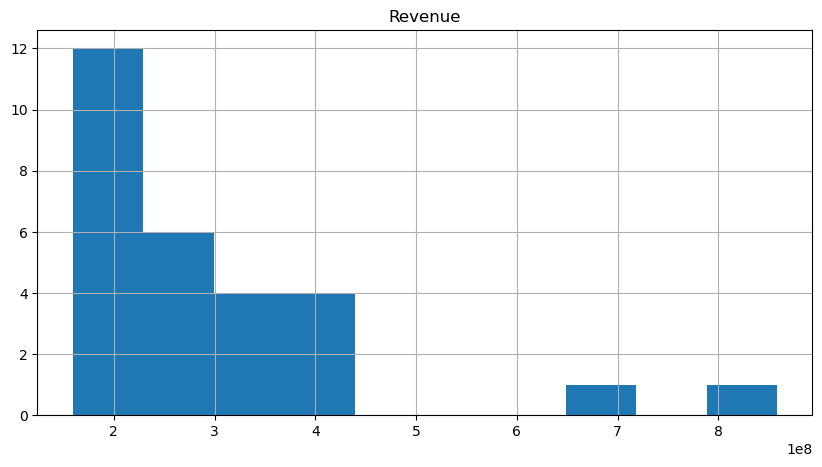

In [112]:
top_movies.hist(figsize= (10, 5))

Text(0.5, 1.0, 'Box Office Revenues ')

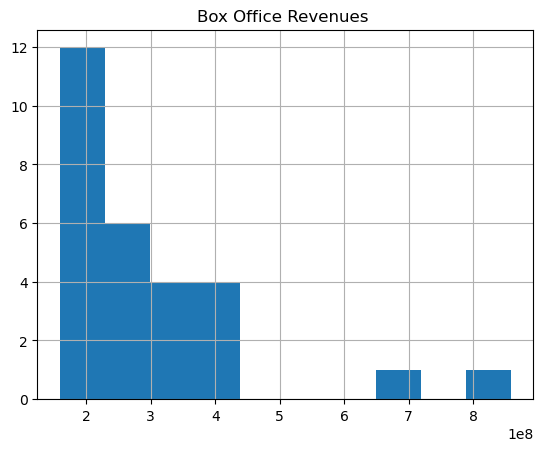

In [116]:
top_movies.Revenue.hist()
plt.title("Box Office Revenues ") 

Text(0, 0.5, 'Revenue')

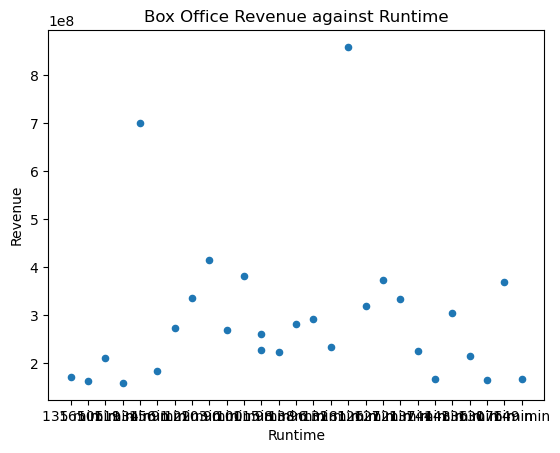

In [119]:
top_movies.plot(x = 'Runtime', y = 'Revenue', kind = 'scatter')
plt.title("Box Office Revenue against Runtime")
plt.xlabel('Runtime')
plt.ylabel('Revenue')        